<h1>Problem Statement: To do Sentiment analysis on airline tweets dataset and build a machine learning
    model which will text data and predict whether it is positivr or negative tweet</h1>
<h2>Objective</h2>
<i>You are given a data of US Airline tweets and their sentiment. The task is to do sentiment analysis 
about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and 
contributors were asked to first classify positive, negative, and neutral tweets, followed by 
categorizing negative reasons (such as "late flight" or "rude service").</i>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('airline_tweets.csv')

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<h1>Exploratory Data Analysis On Airline Tweet Dataset</h1>

<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

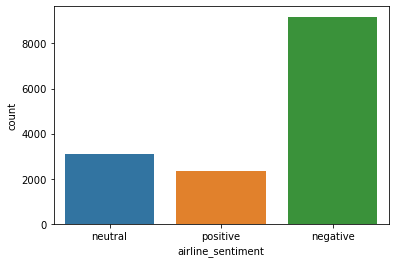

In [4]:
sns.countplot(data=df,x='airline_sentiment')

In [5]:
'''We can see from the plot that most people are tweeting negatively'''

'We can see from the plot that most people are tweeting negatively'

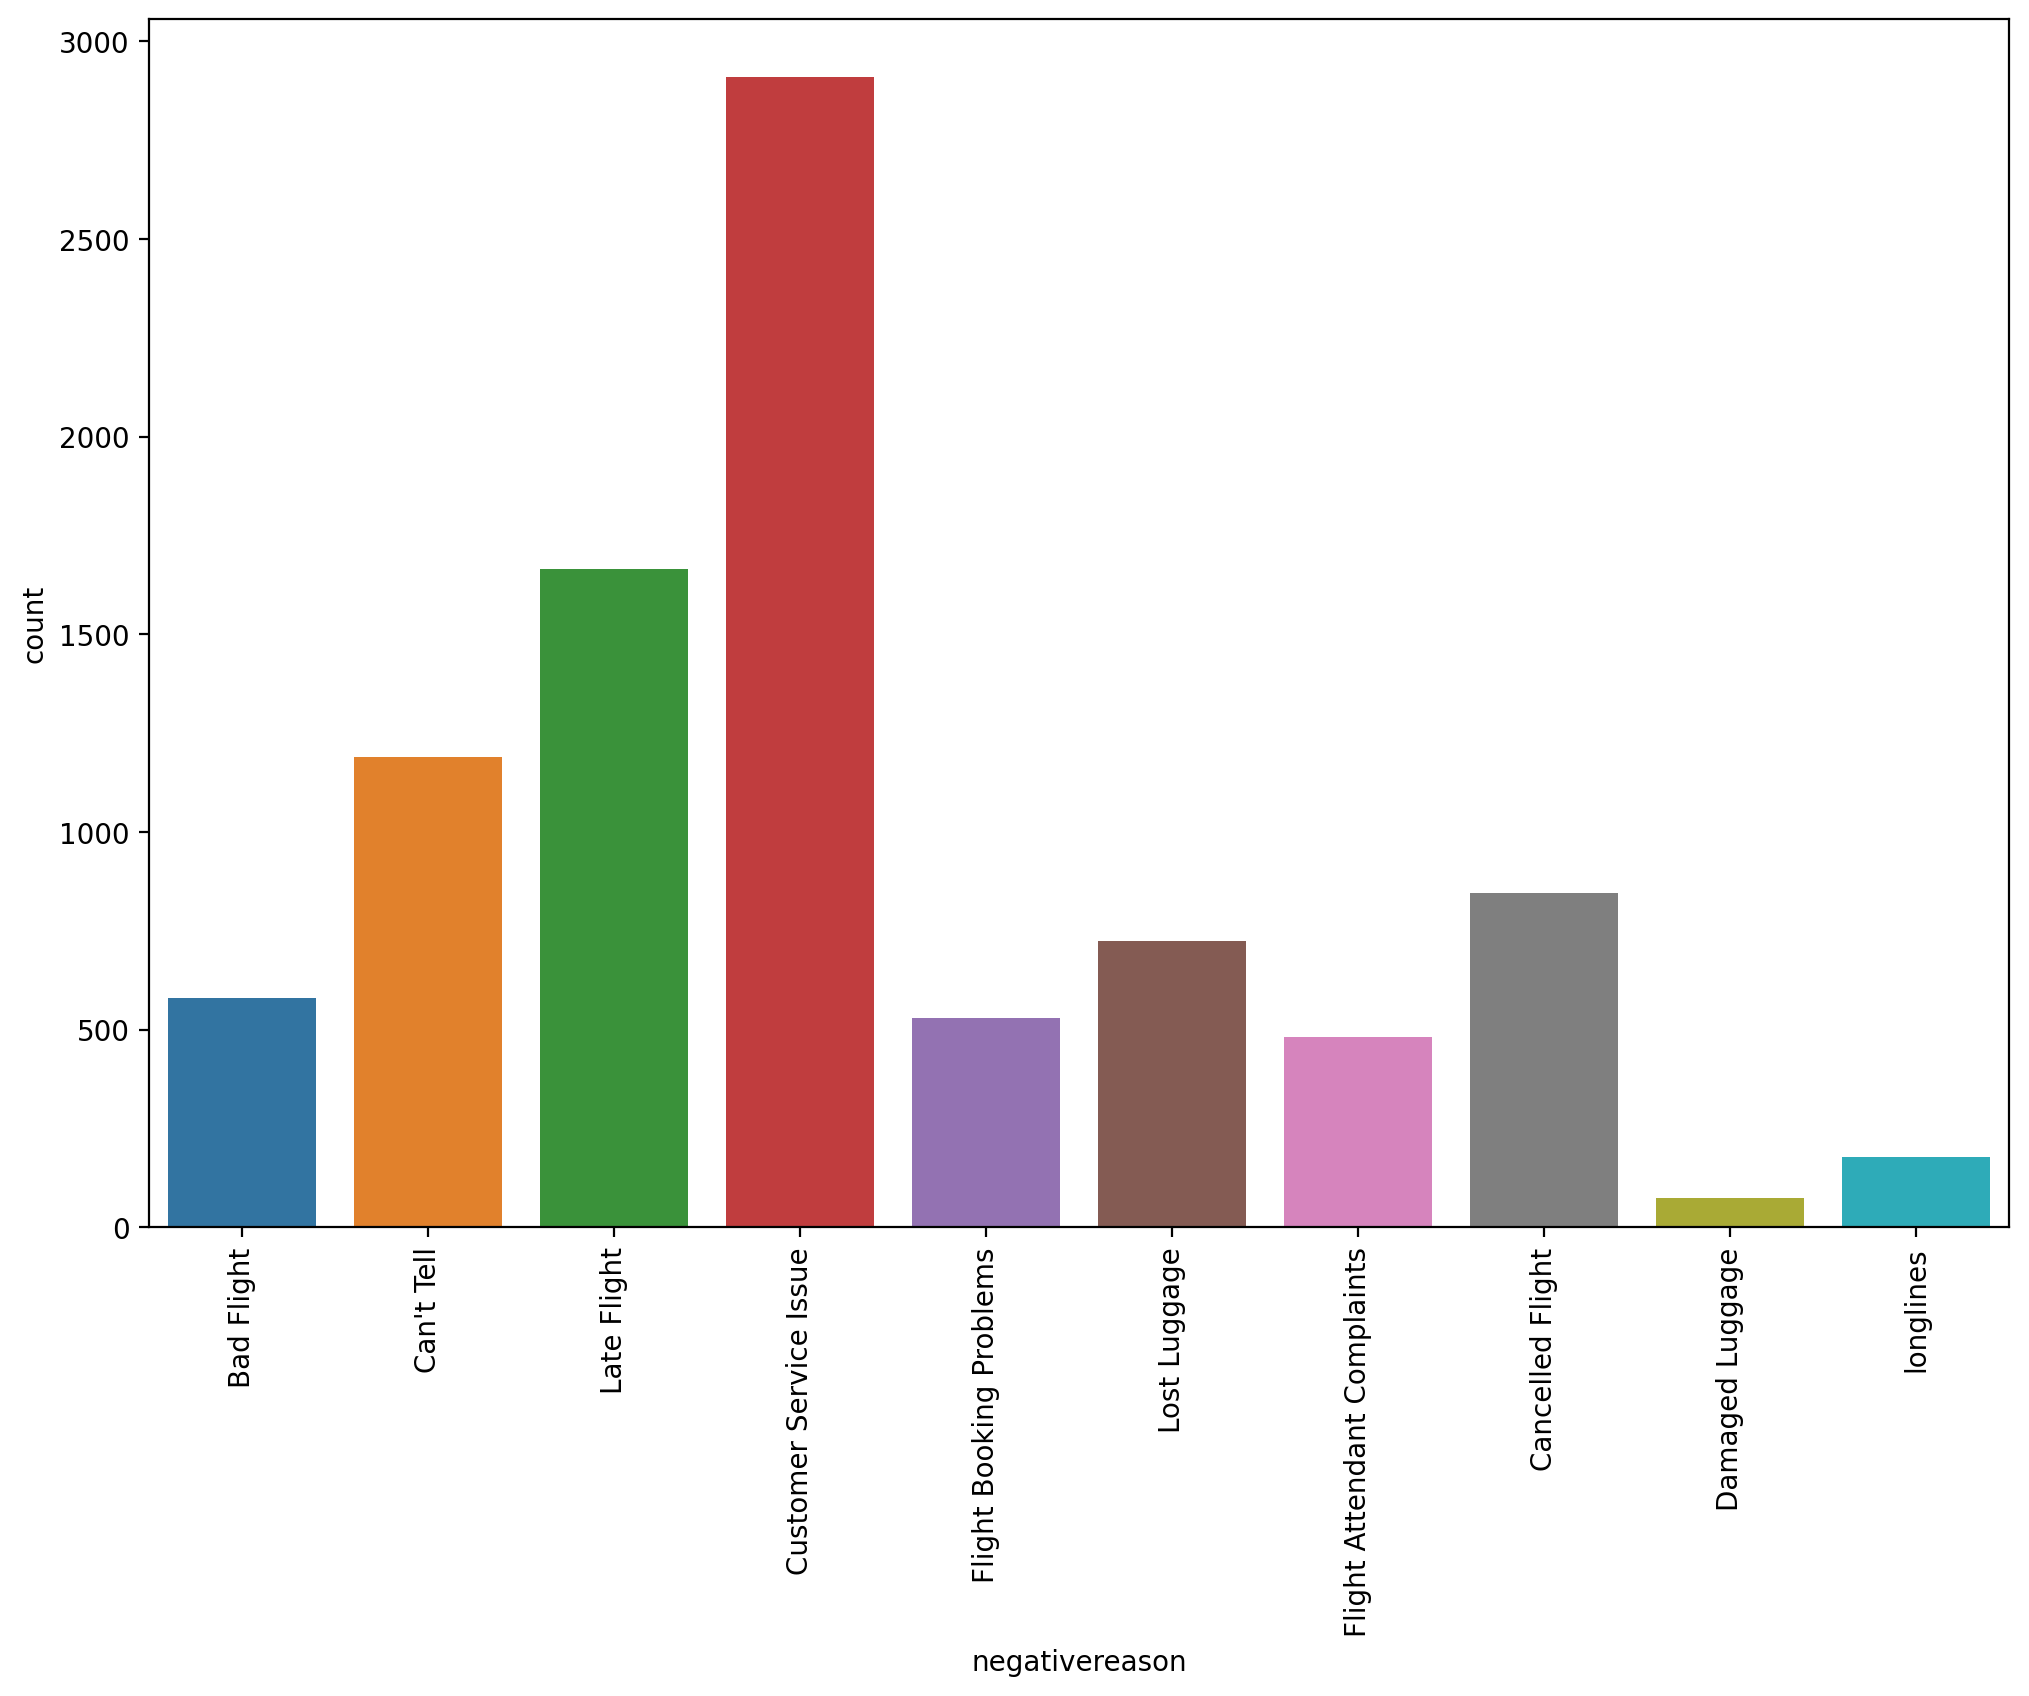

In [6]:
plt.figure(figsize=(12,8),dpi=200)
sns.countplot(data=df,x='negativereason')
plt.xticks(rotation=90);

In [7]:
'''From the most people had neg tweet bc of customer service issue'''

'From the most people had neg tweet bc of customer service issue'

<AxesSubplot:xlabel='airline', ylabel='count'>

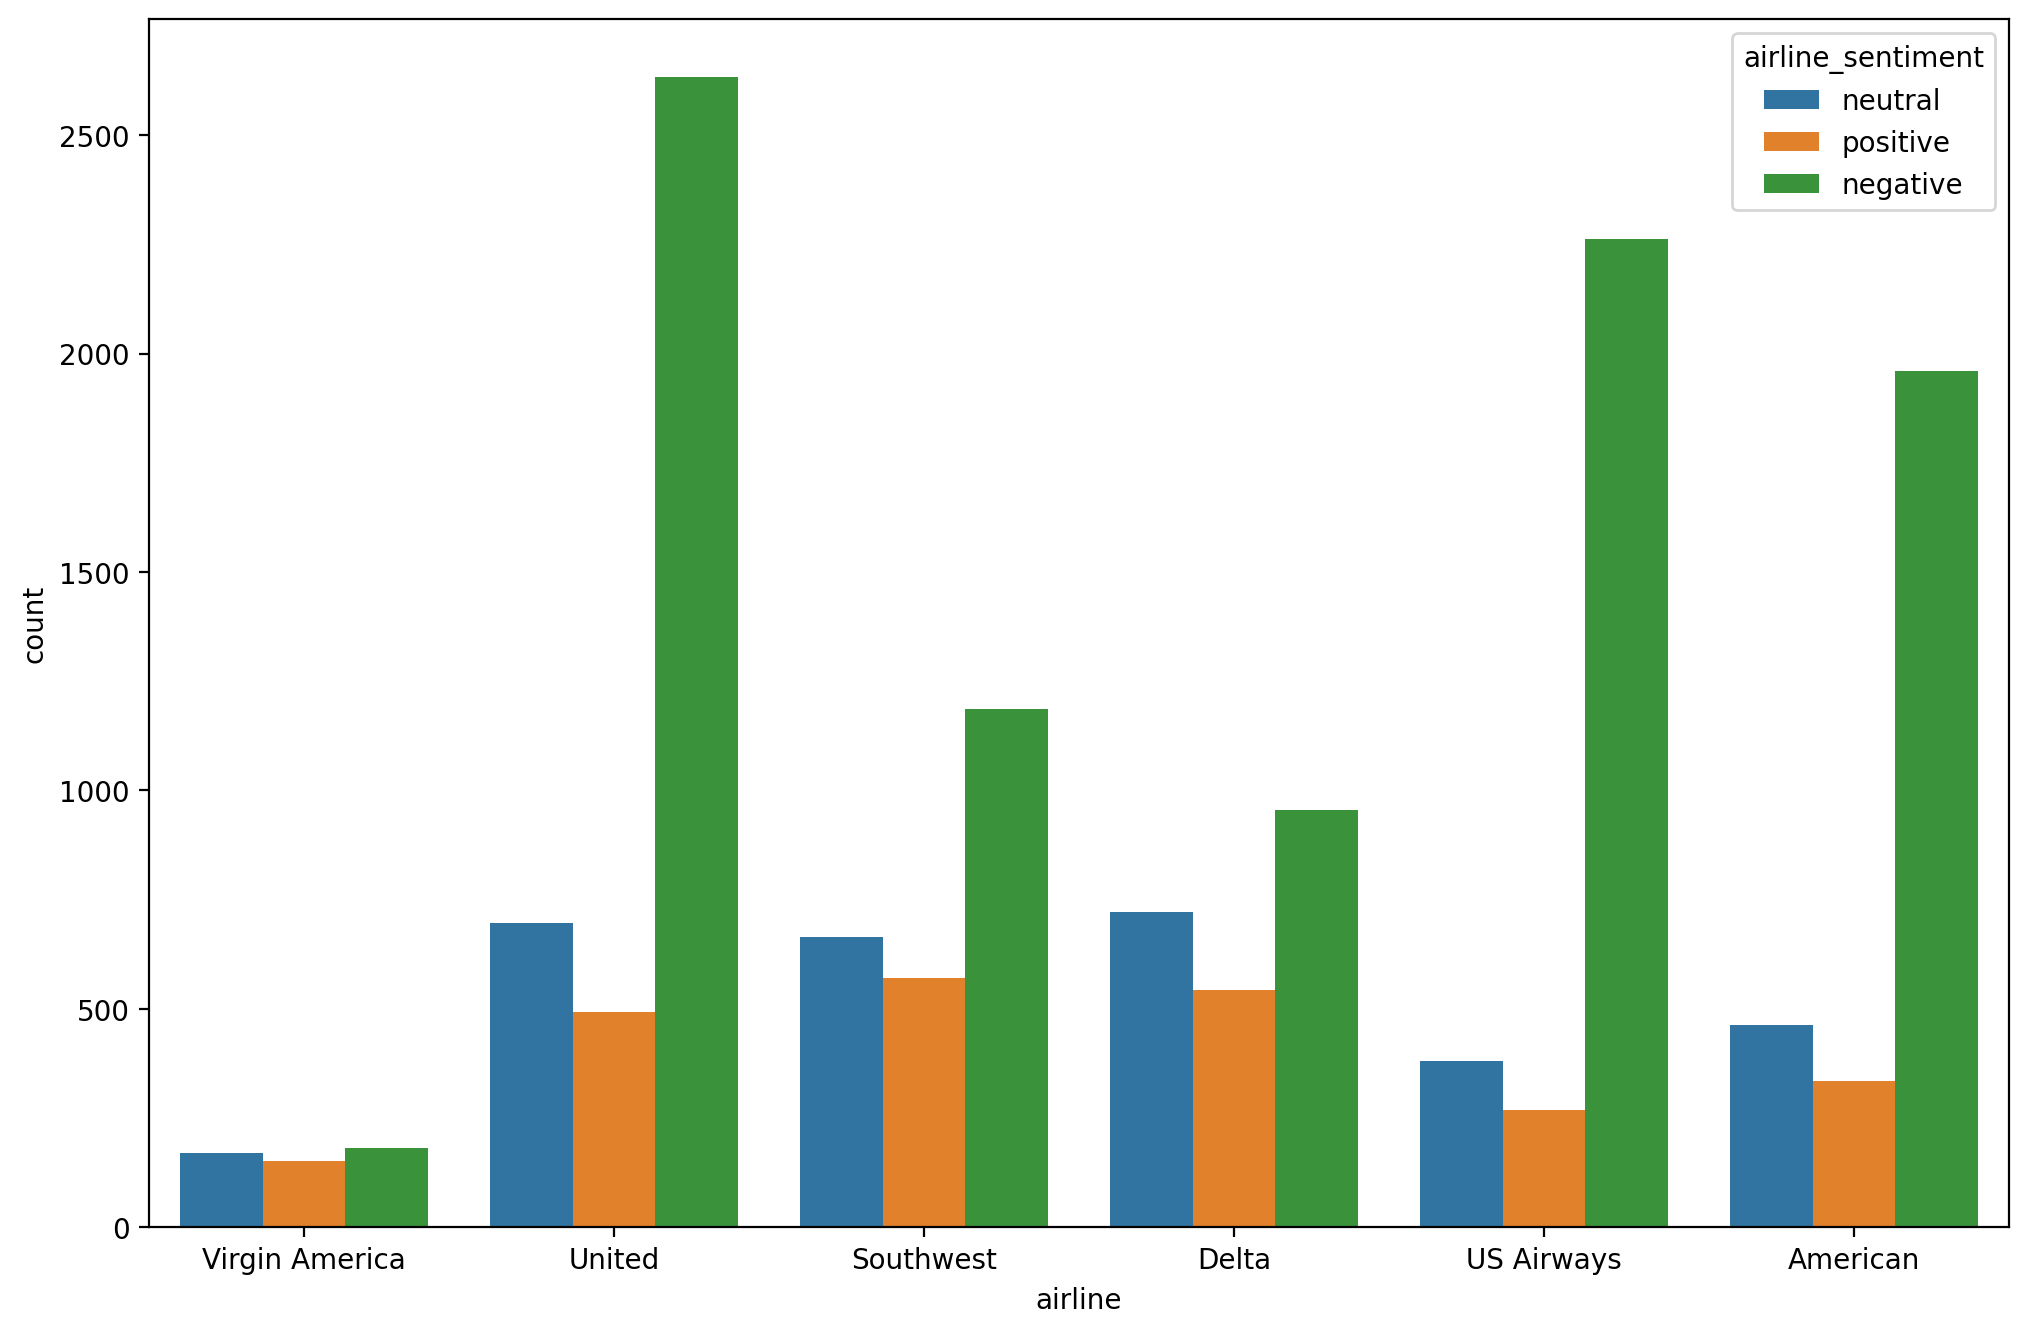

In [8]:
plt.figure(figsize=(12,8),dpi=200)
sns.countplot(data=df,x='airline',hue='airline_sentiment')

In [9]:
'''From this plot we can see tht united has most of the negative tweets and Virgin America has most
balanced number of of negative,positive and neutral tweets'''

'From this plot we can see tht united has most of the negative tweets and Virgin America has most\nbalanced number of of negative,positive and neutral tweets'

In [10]:
df.describe(include='all')

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
count,1.464000e+04,14640,14640.000000,9178,10522.000000,14640,40,14640,32,14640.000000,14640,1019,14640,9907,9820
unique,NaN,3,NaN,10,NaN,6,3,7701,13,NaN,14427,832,14247,3081,85
top,NaN,negative,NaN,Customer Service Issue,NaN,United,negative,JetBlueNews,Customer Service Issue,NaN,@united thanks,"[0.0, 0.0]",2015-02-24 09:54:34 -0800,"Boston, MA",Eastern Time (US & Canada)
freq,NaN,9178,NaN,2910,NaN,3822,32,63,12,NaN,6,164,5,157,3744
mean,5.692184e+17,NaN,0.900169,NaN,0.638298,NaN,NaN,NaN,NaN,0.082650,NaN,NaN,NaN,NaN,NaN
std,7.791112e+14,NaN,0.162830,NaN,0.330440,NaN,NaN,NaN,NaN,0.745778,NaN,NaN,NaN,NaN,NaN
min,5.675883e+17,NaN,0.335000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,5.685592e+17,NaN,0.692300,NaN,0.360600,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,5.694779e+17,NaN,1.000000,NaN,0.670600,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,5.698905e+17,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


In [11]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

<h2>Observation</h2>
<i>We can see that features like negativereason, negativereasonconfidence.airline_sentiment_gold
negativereason_gold,tweet_coord,,tweet_created,tweet_location and user_timezone are some of the
features which have missing values</i>

In [12]:
df.duplicated().sum()

36

In [13]:
df=df.drop_duplicates()

In [14]:
df.duplicated().sum()

0

In [15]:
df.nunique()

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64

<h2>Observations:</h2>
<i>We can see the number of unique values from the above output like airline_sentiment has 3 unique
values and text has many unique values which is accordance to the rule since many people will 
have lots of different reviews about the airline</i>

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14604 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14604 non-null  int64  
 1   airline_sentiment             14604 non-null  object 
 2   airline_sentiment_confidence  14604 non-null  float64
 3   negativereason                9159 non-null   object 
 4   negativereason_confidence     10503 non-null  float64
 5   airline                       14604 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14604 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14604 non-null  int64  
 10  text                          14604 non-null  object 
 11  tweet_coord                   1015 non-null   object 
 12  tweet_created                 14604 non-null  object 
 13  t

<h2>Observations:</h2>
<i>There are 15 columns in the dataset. Half of the columns have null values. Considering both dependent and independent variables not having any null values, we will not do any null value processing. Most columns in the dataset are of object type. airline_sentiment is our dependent / target variable. text column is our independent variable that we will use for analysis. All other columns will be dropped at a later stage.</i>

<H3>Filtering data into Important feature and labels</H3>

In [17]:
data=df[['text','airline_sentiment']]

In [18]:
data

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
...,...,...
14635,@AmericanAir thank you we got on a different f...,positive
14636,@AmericanAir leaving over 20 minutes Late Flig...,negative
14637,@AmericanAir Please bring American Airlines to...,neutral
14638,"@AmericanAir you have my money, you change my ...",negative


In [20]:
data=data.drop(data.loc[data['airline_sentiment']=='neutral'].index)

In [22]:
data.nunique()

text                 11381
airline_sentiment        2
dtype: int64

<h3>Data Cleaning and preprocessing of text</h3>

In [26]:
## Preprocessing libraries
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
#label encoding on airline_sentiment
le=LabelEncoder()
le.fit(data['airline_sentiment'])
data['airline_sentiment_encoded']=le.transform(data['airline_sentiment'])

In [105]:
data

,text,airline_sentiment,airline_sentiment_encoded,clean_tweet
1,@VirginAmerica plus you've added commercials t...,positive,1,virginamerica plus added commercials experienc...
3,@VirginAmerica it's really aggressive to blast...,negative,0,virginamerica really aggressive blast obnoxiou...
4,@VirginAmerica and it's a really big bad thing...,negative,0,virginamerica really big bad thing
5,@VirginAmerica seriously would pay $30 a fligh...,negative,0,virginamerica seriously would pay flight seats...
6,"@VirginAmerica yes, nearly every time I fly VX...",positive,1,virginamerica yes nearly every time fly vx ear...
...,...,...,...,...
14633,@AmericanAir my flight was Cancelled Flightled...,negative,0,americanair flight cancelled flightled leaving...
14634,@AmericanAir right on cue with the delays👌,negative,0,americanair right cue delays
14635,@AmericanAir thank you we got on a different f...,positive,1,americanair thank got different flight chicago
14636,@AmericanAir leaving over 20 minutes Late Flig...,negative,0,americanair leaving minutes late flight warnin...


<h2>Observations:</h2>
<i>We can see here that LabelEncoder has converted the positive and negative sentiments into numerical
values like 1 and 0 which can easily be taken by the machine learning model.</i>

In [34]:
def tweet_to_words(tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words ))

In [36]:
import nltk
nltk.download('stopwords')
data['clean_tweet']=data['text'].apply(lambda x: tweet_to_words(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ravan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [37]:
data

,text,airline_sentiment,airline_sentiment_encoded,clean_tweet
1,@VirginAmerica plus you've added commercials t...,positive,1,virginamerica plus added commercials experienc...
3,@VirginAmerica it's really aggressive to blast...,negative,0,virginamerica really aggressive blast obnoxiou...
4,@VirginAmerica and it's a really big bad thing...,negative,0,virginamerica really big bad thing
5,@VirginAmerica seriously would pay $30 a fligh...,negative,0,virginamerica seriously would pay flight seats...
6,"@VirginAmerica yes, nearly every time I fly VX...",positive,1,virginamerica yes nearly every time fly vx ear...
...,...,...,...,...
14633,@AmericanAir my flight was Cancelled Flightled...,negative,0,americanair flight cancelled flightled leaving...
14634,@AmericanAir right on cue with the delays👌,negative,0,americanair right cue delays
14635,@AmericanAir thank you we got on a different f...,positive,1,americanair thank got different flight chicago
14636,@AmericanAir leaving over 20 minutes Late Flig...,negative,0,americanair leaving minutes late flight warnin...


In [38]:
#creating X feature and y label

X=data['clean_tweet']   #features
y=data['airline_sentiment_encoded'] #labels

<h1>For splitting the X feature and Y label into training and test sets</h1>

In [39]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(9210,) (2303,) (9210,) (2303,)


<h2>Importing the TFIDF Vectorizer</h2>

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [49]:
tfidf=TfidfVectorizer(stop_words='english')

In [50]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [52]:
X_train_tfidf=tfidf.transform(X_train)

In [53]:
X_test_tfidf=tfidf.transform(X_test)

<h2>Model Building of different Model Algorithms</h2>

In [55]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(X_train_tfidf,y_train)

MultinomialNB()

In [56]:
from sklearn.svm import SVC,LinearSVC
rbf=SVC()
rbf.fit(X_train_tfidf,y_train)

SVC()

In [57]:
linesvc=LinearSVC()
linesvc.fit(X_train_tfidf,y_train)

LinearSVC()

In [59]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(X_train_tfidf,y_train)

BernoulliNB()

In [60]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,random_state=101)
rfc.fit(X_train_tfidf,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

<h2>Model Evaluation for the different models we have trained</h2>

In [61]:
#importing different evaluation metrices
from sklearn.metrics import plot_confusion_matrix,classification_report,accuracy_score

In [90]:
#building a function which can predict,print classification report and plot_confusion matrix at once
def evaluate(model):
    preds=model.predict(X_test_tfidf)
    print('Classification report for this model is:\n',classification_report(y_test,preds))
    print('\n')
    print('Accuracy of this model is:', accuracy_score(y_test,preds))
    print('\n')
    print('Plot confusion matriix of this model is:')
    plot_confusion_matrix(model,X_test_tfidf,y_test)

Classification report for this model is:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91      1840
           1       0.99      0.19      0.32       463

    accuracy                           0.84      2303
   macro avg       0.91      0.60      0.61      2303
weighted avg       0.86      0.84      0.79      2303



Accuracy of this model is: 0.8371689101172384


Plot confusion matriix of this model is:


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


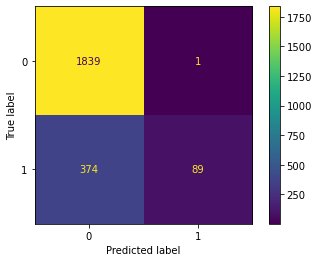

In [91]:
evaluate(nb)

<H4>Observation: We can from the above that accuracy is 83.71 percentage and the multinomial naive bayes model
is performing quite well in indentifying the negative tweets and we can also see the values of 
TP,TN,FP and FN as 1839,89,1 and 374 for the Multinomial naive bayes model.</H4>

Classification report for this model is:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      1840
           1       0.90      0.62      0.74       463

    accuracy                           0.91      2303
   macro avg       0.91      0.80      0.84      2303
weighted avg       0.91      0.91      0.90      2303



Accuracy of this model is: 0.9101172383847156


Plot confusion matriix of this model is:


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


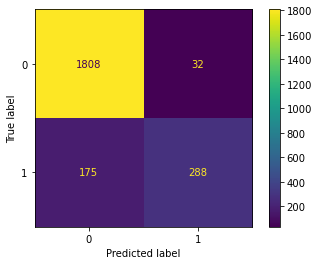

In [92]:
evaluate(rbf)

<H4>Observation: We can from the above that accuracy is 93.01 percentage and the support vector classifier model
is performing quite well in indentifying the negative tweets and we can also see the values of 
TP,TN,FP and FN as 1808, 288, 32 and 175 for the Support Vector Classifier model with rbf kernel.</H4>

Classification report for this model is:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      1840
           1       0.85      0.71      0.78       463

    accuracy                           0.92      2303
   macro avg       0.89      0.84      0.86      2303
weighted avg       0.91      0.92      0.91      2303



Accuracy of this model is: 0.9166304819800261


Plot confusion matriix of this model is:


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


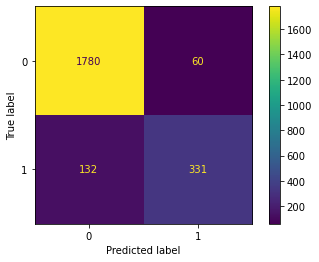

In [93]:
evaluate(linesvc)

<H4>Observation: We can from the above that accuracy is 91.66 percentage and the multinomial naive bayes model
is performing quite well in indentifying the negative tweets and we can also see the values of 
TP,TN,FP and FN as 1780, 331, 60 and 132 for the support vector classifier with linear kernel.</H4>

Classification report for this model is:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93      1840
           1       0.91      0.46      0.61       463

    accuracy                           0.88      2303
   macro avg       0.90      0.73      0.77      2303
weighted avg       0.89      0.88      0.87      2303



Accuracy of this model is: 0.883195831524099


Plot confusion matriix of this model is:


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


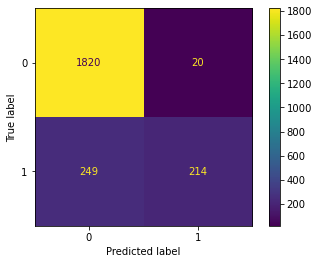

In [95]:
evaluate(bnb)

<H4>Observation: We can from the above that accuracy is 88.31 percentage and the bernoulli naive bayes model
is performing quite well in indentifying the negative tweets and we can also see the values of 
TP,TN,FP and FN as 1820, 214, 20 and 249 for bernoulli naive bayes model.</H4>

Classification report for this model is:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      1840
           1       0.84      0.56      0.68       463

    accuracy                           0.89      2303
   macro avg       0.87      0.77      0.81      2303
weighted avg       0.89      0.89      0.88      2303



Accuracy of this model is: 0.8914459400781589


Plot confusion matriix of this model is:


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


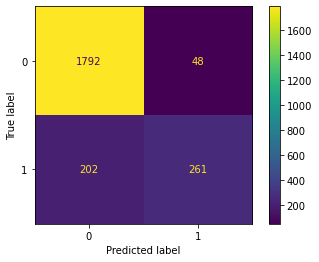

In [96]:
evaluate(rfc)

<H4>Observation: We can from the above that accuracy is 89.14 percentage and the random forest model
is performing quite well in indentifying the negative tweets and we can also see the values of 
TP,TN,FP and FN as 1792, 261, 48 and 202 for random forest with 10 estimators.</H4>

<h2>Conclusion:</h2>
<i>We can conclude from the above observations that Support Vector Classifier with rbf kernel has classified
the airline tweets more with the accuracy of 91.01% but because of accuracy paradox we can see that this model
is classifying more False positives (32) and False negatives (175), to deal with this situation of accuracy
paradox we will check precision, recall and f1 score which have better evaluator of performance than 
accuracy score. From the above table plot confusion matrices of different models, we can say that Support
vector classifier with linear kernel classifies has the best values of precision, recall and f1-score
than any other model, hence we have to conclude that support vector classifier with linear kernel is able
to classifiy the tweets with more precision than any other model we have used.</i>